In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,15) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

from scipy.misc.pilutil import imread

Using TensorFlow backend.


In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_test original shape (10000, 28, 28)
y_test original shape (10000,)
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [3]:
#for i in range(9):
#    plt.subplot(3,3,i+1)
#    plt.imshow(X_train[i], cmap='gray', interpolation='none')
#    plt.title("Class {}".format(y_train[i]))

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("Training matrix shape", Y_train.shape)
print("Testing matrix shape", Y_test.shape)

Training matrix shape (60000, 10)
Testing matrix shape (10000, 10)


In [6]:
model = Sequential()

model.add(Dense(784, input_shape=(784,)))
model.add(Activation('relu'))                  
model.add(Dropout(0.1))

model.add(Dense(700))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(10))
model.add(Activation('softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [8]:
model.fit(X_train, Y_train,batch_size=128,nb_epoch=4,verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 28s - loss: 0.2136 - acc: 0.9351 - val_loss: 0.1100 - val_acc: 0.9653

In [9]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.070024207761
Test accuracy:  0.9791


In [10]:
# Test score:  0.0604547761369
# Test accuracy:  0.981

In [14]:
#predicted_classes = model.predict_classes(X_test)

#correct_indices = np.nonzero(predicted_classes == y_test)[0]
#incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


In [15]:
#predicted_classes_train = model.predict_classes(X_train)

#correct_indices_train = np.nonzero(predicted_classes_train == y_train)[0]
#incorrect_indices_train = np.nonzero(predicted_classes_train != y_train)[0]

In [89]:
X_user = imread('User_Number.png', flatten=1)

y_user = 5

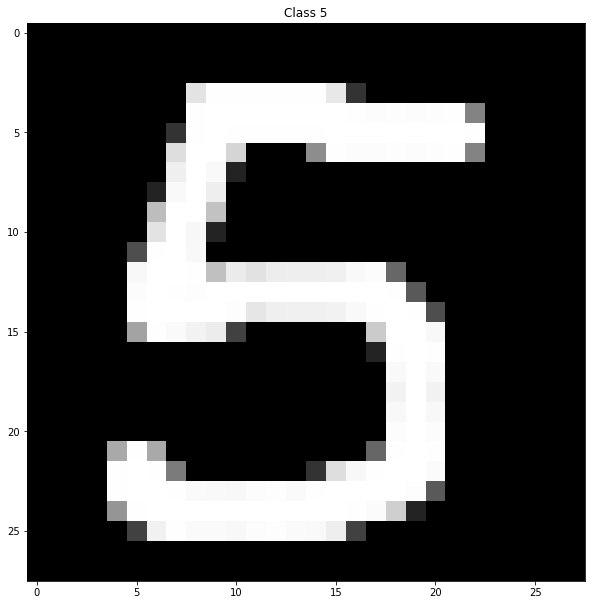

In [90]:
plt.imshow(X_user, cmap='gray', interpolation='none')
plt.title("Class {}".format(y_user))

In [91]:
X_user = X_user.reshape(1, 784)
X_user = X_user.astype('float32')
X_user /= 255
print("X user matrix shape", X_user.shape)
#print("X user matrix", X_user)

Y_user = np_utils.to_categorical(y_user, nb_classes)
print("Y user matrix shape", Y_user.shape)
#print("Y user matrix", Y_user)

X user matrix shape (1, 784)
Y user matrix shape (1, 10)


In [92]:
predicted_classes = model.predict_classes(X_user)

correct_indices = np.nonzero(predicted_classes == y_user)[0]
incorrect_indices = np.nonzero(predicted_classes != y_user)[0]

1/1 [==============================] - 0s


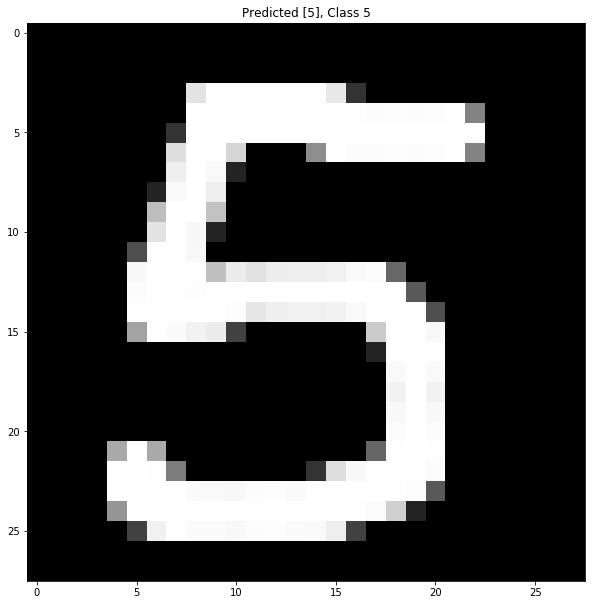

In [93]:
plt.figure()

plt.imshow(X_user.reshape(28,28), cmap='gray', interpolation='none')
plt.title("Predicted {}, Class {}".format(predicted_classes, y_user))

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:49]):
    plt.subplot(7,7,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

In [ ]:
   
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:49]):
    plt.subplot(7,7,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))